# Welcome to the University of Illinois administrative office!

We are so thankful that you agreed to take a look at our salary data. We have a dataset for you that we need you to perform some analysis on and create some plots that we can show the state to get funding for another year. Further details follow below.

Thanks again!
 
\- Chancellor Kelly

## Lab: Plots

In this lab, you will:

- Work with real UIUC salary data to explore some of the statistics that we talked about in class: mean, median, mode, standard deviation, and quartiles!
- Practice creating plots to visualize quantitative data: boxplots, scatter plots, and histograms

# 0. Import the Data

In the same directory as this notebook find the dataset that is provided.  You know what to do to import the libraries and read the data! :)

In [3]:
import pandas as pd
df= pd.read_csv('graybook.csv')
df

,Employee Name,Academic Title,Primary Job Title,Primary College,Primary Department,Salary,PrevFTE,FTE,All Titles,Empl Class,PrevSalary
0,"Edakara, Manu I",NaN,ASSOC DIR ENTREPRNRL CMTY,Business,Academy Entrepreneurial Ldrshp,66300.00,1.0,1.0,['ASSOC DIR ENTREPRNRL CMTY'],['BA'],65000.00
1,"Quarton, John Edward",NaN,SR DIR INNOVA ENTRPRNRL PRGM,Business,Academy Entrepreneurial Ldrshp,150480.70,1.0,1.0,['SR DIR INNOVA ENTRPRNRL PRGM' 'DIR HOEFT T&M...,['BA'],147530.00
2,"Werpetinski, Valeri A",NaN,"VST ASSOC DIR, ENTRPRNRL EDUC",Business,Academy Entrepreneurial Ldrshp,71400.00,1.0,1.0,"['VST ASSOC DIR, ENTRPRNRL EDUC']",['BA'],70000.00
3,"Abdel-Khalik, Ahmed Rashad",PROF,PROF,Business,Accountancy,318007.00,1.0,1.0,['DIR CIERA' 'PROF' 'V K ZIMMERMAN PROF'],['BC' 'AA'],312556.00
4,"Ahmed, Waqar",LECTURER,LECTURER,Business,Accountancy,96691.00,1.0,1.0,['LECTURER'],['AA'],96691.00
...,...,...,...,...,...,...,...,...,...,...,...
3550,"Wolfson, Ouri",PROF,???,???,???,200456.78,0.0,0.0,['PROF'],['AA'],200456.78
3551,"Wu, Maryalice S",ADJ ASST PROF,???,???,???,81962.71,0.0,0.0,['ADJ ASST PROF'],['AA'],80355.60
3552,"Yau, Peter M",RES ASST PROF,???,???,???,131447.50,0.0,0.0,['RES ASST PROF'],['AL'],128617.91
3553,"Yodh, Jaya G",RES ASST PROF,???,???,???,112200.00,0.0,0.0,['RES ASST PROF'],['AL'],110000.00


# 1. The Basics


## Exploring measures of center: Mean, Median, and Standard Deviation

The first thing we need from you is to get us some basics statistics at both a university and department level. We need to know:
1. the number of employees at UIUC
2. the mean salary
3. the median salary
4. the standard deviation

In [4]:
university_num_emp = len(df['Employee Name'])
university_num_emp



3555

In [5]:
university_mean_sal = df['Salary'].mean()
university_mean_sal



101284.91668642394

In [6]:
university_median_sal = df['Salary'].median()
university_median_sal



86995.0

In [7]:
university_std_sal = df['Salary'].std()
university_std_sal



55129.29496464772

In [8]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
x = university_num_emp + university_mean_sal + university_median_sal + university_std_sal
y = ((university_mean_sal - university_median_sal) * university_std_sal) / university_num_emp

assert( abs(x - 246964.21165107167) < 1 ), "It looks like your calculations are off?"
assert( abs(y - 221601.415478511) < 1 ), "It looks like your calculations are off?"

## Department-level Data

Now we need the same data at a department level. In other words, you want each of those statistics for each department.  There was a certain function you learned a bit ago that will help you **group** all of the people in each department so you can find departmental aggregates.

Instead of just grouping by a single aggregate, use **Python list syntax** to aggregate to find the `count`, `mean`, and `median`.  After that, select only the `'Primary Department'` and `'Salary'` data.

*(You can view technical docs here:
https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html)*

In [16]:
group = df.groupby('Primary Department')
agg_df = group.agg(['count','mean','median']).reset_index()

agg_df= agg_df[['Primary Department','Salary']]# first bracket is to access a df, next bracket is to make it a list

# Display 5 random rows to make sure it works:
agg_df.sample(5)
agg_df['Salary']['mean']
agg_df['Primary Department']
agg_df

Primary Department Salary                           
                                     count           mean      median
0                               ???    118  154959.069576  120825.305
1             ADM Institure for PHL      2   58051.500000   58051.500
2    Academy Entrepreneurial Ldrshp      3   96060.233333   71400.000
3                       Accountancy     67  188585.546119  210161.000
4         Aces Info Tech & Cmc Svcs     23   71087.565652   70582.130
..                              ...    ...            ...         ...
135     Technology Entrepreneur Ctr      7   77353.428571   61200.000
136                         Theatre     18   76580.444444   76343.500
137       Urban & Regional Planning     15   92951.400000   88752.000
138          Veterinary Prog in Agr      4  148582.230000  149417.760
139                       eLearning     14   69615.987143   62934.000

[140 rows x 4 columns]

In [13]:
## == TEST CASES for Puzzle 1.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( len(agg_df) == 140 ), "You should have 140 different departments.  Check to make sure you grouped the data?"
assert( "Salary" in agg_df ), "You must have a salary output"
assert( "mean" in agg_df["Salary"] ), "Make sure you have a mean in your salary"
assert( "count" in agg_df["Salary"] ), "Make sure you have a count in your salary"
assert( "median" in agg_df["Salary"] ), "Make sure you have a median in your salary"
assert( len(agg_df.columns) == 4 ), "Make sure you have ONLY the salary data and the department"

Your boss is thrilled with the numbers you've come up with! Now she's ready to go to the state to ask for money. To know how much to ask for, she wants you to **add a column** to the department-grouped DataFrame that is equal to the **median** salary of that department multiplied by the number of people in that department. She wants you to provide her with this table and the sum of all of the values in this column.

Hop to it!

In [17]:
agg_df['MedianMulCount'] = (agg_df['Salary']['count'])*(agg_df['Salary']['median'])

# Display 5 random rows to make sure it works:
agg_df.sample(5)

Primary Department Salary                            \
                                     count           mean     median   
102  Materials Science & Engineerng     30  122333.845000  104349.50   
109                           Music     82   84278.434024   84585.00   
20                     Architecture     32   92319.156250   92943.00   
81                          History     37  108451.355946  106017.46   
12   Agricultural Education Program      6   72990.810000   73414.79   

    MedianMulCount  
                    
102     3130485.00  
109     6935970.00  
20      2974176.00  
81      3922646.02  
12       440488.74

In [18]:
# calculate the total sum of all of the values in the column you added
total_money_needed = agg_df['MedianMulCount'].sum()

total_money_needed

332199238.08000004

In [19]:
## == TEST CASES for Puzzle 1.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert( abs(total_money_needed - 332199238) < 1 ), "Looks like your multiplication did not work properly!"

# 2. Estimations

Great! Your boss is ready to go to the state with this number. Is this a good estimate of the amount of money she will need?

Let's calculate the standard deviation for each department to find out.  Remember, SD measures the spread around the average.  The larger the SD, the more spread out the numbers are from the average.

Add another column to your dataframe with the departmental data which holds the value of the standard deviation of the salaries for that department.  *(Hint: This may require you to re-group your original `df`)*

In [36]:
# add that column here!
std_df= df.groupby('Primary Department')
std_salary= std_df.agg("std").reset_index()
std_salary

agg_df['Salary STD'] = std_salary['Salary']
#std_dept_sal= std_df.groupby(['Primary Department','Salary'])



# Display 5 random rows to make sure it works:
agg_df.sample(5)

Primary Department Salary                            \
                                   count           mean     median   
106  Micro and Nanotechnology Lab     11   78343.272727   84146.00   
77       Gies College of Business     16  126040.387500   78500.00   
47                  Crop Sciences     47  100323.343191   93167.66   
43               Computer Science    105  126891.428571  114277.00   
78     Gies Mktg & Communications      7   67628.874286   65380.00   

    MedianMulCount    Estimation     Salary STD  
                                                 
106      925606.00  33026.123287   27562.378044  
77      1256000.00  33026.123287  110414.835800  
47      4378880.02  33026.123287   41160.692004  
43     11999085.00  33026.123287   51326.768201  
78       457660.00  33026.123287   14331.220437

Are there any departments for which your boss' way of approximating the total salary would be fairly accurate? Are there deparments where it would not be an okay approximation?  *Hint*: It might be helpful to find the largest standard deviation!

In [38]:
# Not okay to use approximation for this department
agg_df.nlargest(1,"Salary STD")

Primary Department Salary                            MedianMulCount  \
                      count           mean      median                  
0                ???    118  154959.069576  120825.305    14257385.99   

     Estimation     Salary STD  
                                
0  33026.123287  115523.851215

In [39]:
agg_df.nsmallest(1, "Salary STD")

Primary Department Salary                   MedianMulCount  \
                                    count     mean   median                  
50  Ctr Wounded Veterans Higher Ed      2  61000.0  61000.0       122000.0   

      Estimation   Salary STD  
                               
50  33026.123287  1414.213562

## EDIT THIS CELL:

- One department where it would be an okay approximation is: Ctr Wounded Veterans Higher Ed

- One department where it would not be an okay approximation is: ??? department

Well, I believe you that the mean salary isn't always a good approximation, but your boss doesn't. I think she is more of a visual learner. To help prove our point, let's make a histogram of the salaries in the computer science department.

## 2.1 Histograms
Create a histogram of the salaries within the computer science department. Pandas has a nice function that helps you accomplish this: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

Hint: in order to apply this function, you will need a DataFrame `cs_salary_df` with just the data for Computer Science professors.

Play around with putting different values as the *bin* parameter to the function. Which value would you select to present the data to your boss?  Remember, there is no right or wrong number of bins.  You want to pick an amount that allows you to see the overall shape of the histogram.

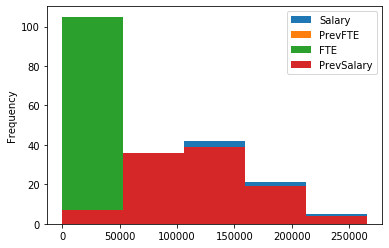

In [42]:
cs_salary_df = df[df['Primary Department']=='Computer Science']

#cs_salary_df= cs_df['Salary']

cs_salary_df.plot.hist(bins=5)
# ...and then create your histogram:




In [43]:
## == TEST CASES for Puzzle 2.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(cs_salary_df["Salary"].sum() == 13323600), "You are not showing the correct data in the histogram"

## 2.2 Boxplots

Ok, you've convinced her. Your boss no longer thinks that the average is a good approximation for each department. To explain to the state why this isn't the case, she wants you to create a plot that shows the distribution of the salaries for each department that is relatively compact (i.e., not 100 tiny histograms). A collection of box plots would work quite nicely!  This allows us to see different quartiles and if departments have outliers!

But first, let's just make one box plot. Again, pandas has a nifty function that can help you do this: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

Make a box plot for the computer science department salaries.

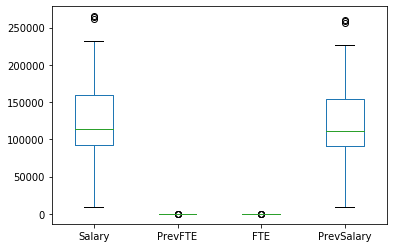

In [44]:
# Create your box plot of the CS salaries:

cs_salary_df.plot.box()


# 3. Confronting your boss
After spending days creating plots, you finally decide to tell your boss that there is an easier way to find out how much money you will need to ask the state for to pay university salaries. Find the exact total amount of money that will be needed to pay everyone in the dataset.

In [50]:
# your code goes here!
total_money = df['Salary'].sum()

total_money

358852459.82

In [51]:
## == TEST CASES for Puzzle 3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(abs(total_money - 358852459) < 1), "Are you sure the total is correct?"

## 4. Your Department

You're awesome!  Now find something interesting about your home department... maybe a box plot or a scatter plot, do whatever interests you, it does not have to be complex (but totally can be!)

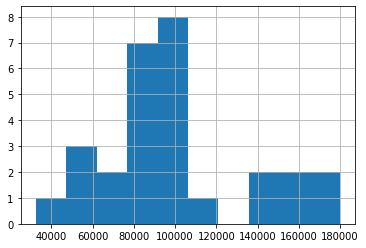

In [52]:
df_stat= df[df['Primary Department']=='Statistics']

df_stat_salary= df_stat['Salary']

df_stat_salary.hist()

## Submit Your Work

You're almost done -- congratulations!

You need to do two more things:

1. Save your work.  To do this, create a **notebook checkpoint** by using the menu within the notebook to go **File -> Save and Checkpoint**

2. After you have saved and checkpointed, exit this notebook and return to the Data Science Discovery page on how to use git to turn this notebook into the course!